Importing relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

Data loading and exploration

In [2]:
data = pd.read_csv('lagos_real_estate_cleaned.csv')
data.head()

,listing_url,title,location,property_type,beds,baths,status,post-date-absolute,price(millions_NGN),log_price_millions_NGN,...,Private Elevator,Study,Cinema,Garden,Water Front,Private Cinema,Water View,Football Pitch,Tennis Court,Sauna
0,https://cwlagos.com/property/3-bedroom-apartme...,3 Bedroom Apartment + BQ,Banana Island,Apartment,3.0,3.0,Rent,2025-06-21,30.000,3.401197,...,1,0,1,0,0,0,0,0,0,0
1,https://cwlagos.com/property/terrace-for-sale-...,TERRACE IN BANANA ISLAND IKOYI,Banana Island,Terraced,5.0,5.0,Sale,2025-06-21,3616.925,8.193379,...,0,0,0,0,0,0,0,0,0,0
2,https://cwlagos.com/property/waterfront-land-i...,"Waterfront Land in Banana Island, Ikoyi",Banana Island,land,0.0,0.0,Sale,2025-07-21,3.500,1.252763,...,0,0,0,0,0,0,0,0,0,0
3,https://cwlagos.com/property/waterfront-land-i...,"Waterfront Land in Banana Island, Ikoyi",Banana Island,land,0.0,0.0,Sale,2025-07-21,3.200,1.163151,...,0,0,0,0,0,0,0,0,0,0
4,https://cwlagos.com/property/brand-new-5-bedro...,Brand New 5 Bedroom Semi-Detached House with W...,Banana Island,Semi Detached,5.0,5.0,Sale,2024-11-18,2170.155,7.682554,...,1,0,0,0,1,0,1,0,0,0


In [3]:
data.shape

(1104, 42)

In [4]:
data.describe()

,beds,baths,price(millions_NGN),log_price_millions_NGN,24hrs Power,30kva generator,5kva inverter,Balcony,BQ,Car Park,...,Private Elevator,Study,Cinema,Garden,Water Front,Private Cinema,Water View,Football Pitch,Tennis Court,Sauna
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,...,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,2.810688,2.813406,710.891714,4.444959,0.360507,0.315217,0.317029,0.322464,0.170290,0.375000,...,0.122283,0.096920,0.085145,0.067935,0.019022,0.083333,0.020833,0.004529,0.006341,0.001812
std,2.362719,2.362360,2842.291139,2.340049,0.480365,0.464813,0.465530,0.467631,0.376058,0.484342,...,0.327760,0.295983,0.279224,0.251748,0.136663,0.276511,0.142891,0.067176,0.079411,0.042544
min,0.000000,0.000000,0.030000,-3.506558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,20.000000,2.995732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,78.750000,4.366152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,482.500000,6.178941,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,47.000000,47.000000,52083.720000,10.860608,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Question 1 - \
What does the overall price distribution of Lagos housing listings look like?**

Data Visualization

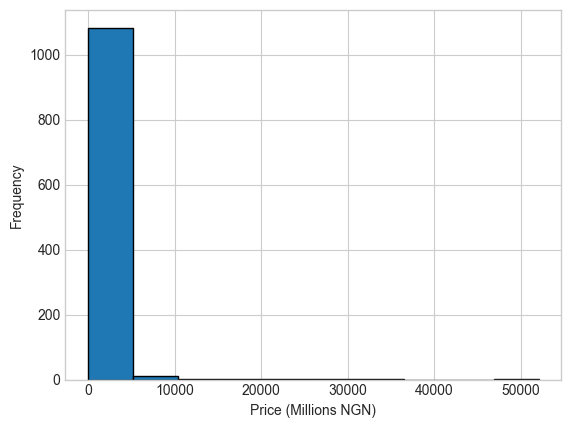

In [5]:
plt.hist(data['price(millions_NGN)'], edgecolor='black')
plt.xlabel('Price (Millions NGN)')
plt.ylabel('Frequency')
plt.show()

As shown by the figure above, our data is highly right-skewed and cannot be easily represented using the raw price values. Instead we would use the log of the price values to better visualize our data.

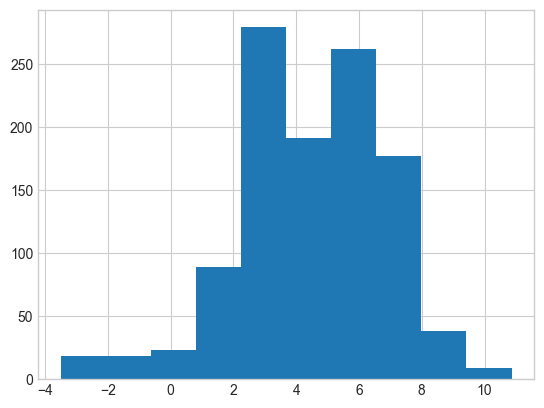

In [6]:
plt.hist(data['log_price_millions_NGN']);

Using the log prices gives a better visualization and reveals an approximate normal/bell-shaped distribution, but the distribution of the data is still not represented properly. 

Using the seaborn library and KDE we can get a much better visualization of our data and it's underlying distribution pattern more clearly as shown below.

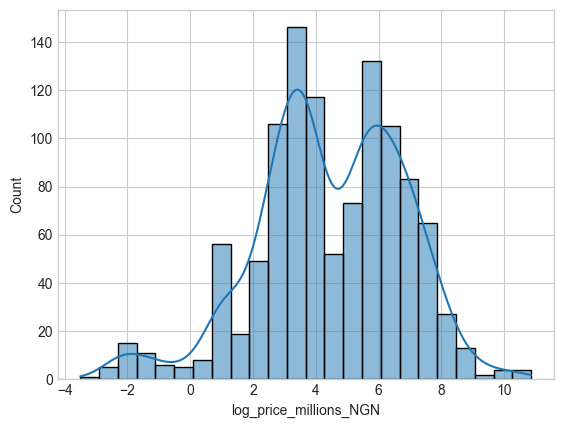

In [7]:
import seaborn as sns
sns.histplot(data=data, x='log_price_millions_NGN', kde=True)
plt.show()

We can also further look at a Density Distribution plot, box plot and violin plot as visualization of our data to further understand it's structure.

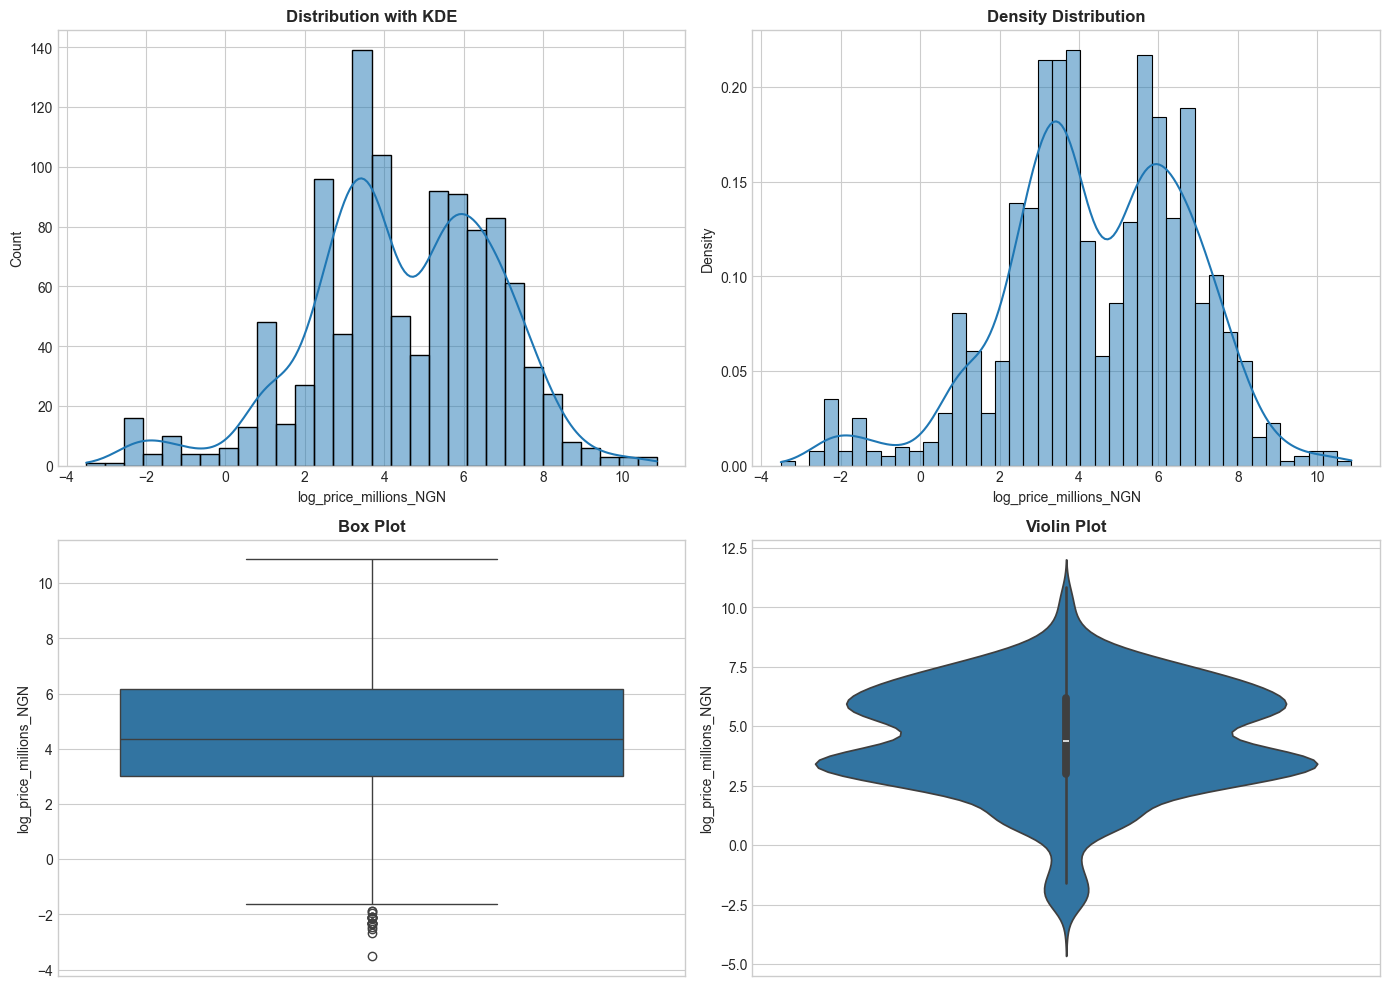

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram with KDE
sns.histplot(data=data, x='log_price_millions_NGN', kde=True, bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution with KDE', fontsize=12, fontweight='bold')

# 2. Density Distribution plot 
sns.histplot(data=data, x='log_price_millions_NGN', stat='density', kde=True, bins=40, ax=axes[0, 1])
axes[0, 1].set_title('Density Distribution', fontsize=12, fontweight='bold')

# 3. Box plot
sns.boxplot(data=data, y='log_price_millions_NGN', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot', fontsize=12, fontweight='bold')

# 4. Violin plot
sns.violinplot(data=data, y='log_price_millions_NGN', ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Now, the density distibution plot normalizes the histogram to show probability density (*making it easier to see where most properties are concentrated*).\
The Box plot reveals quartiles, median and outliers, (*showing that most properties cluster within a certain price range with some high-end outliers*).\
Lastly, the Violin plot sows the full distribution shape (*revealing it's roughly symmetric around the median with some bimodality*).

**In summary - \
The overall price distribution of Lagos housing listings is approximately log-normal when viewed in raw prices (right-skewed), but becomes approximately normal when using log-transformed prices. Most properties are concentrated in the lower-to-middle price range with a small number of high-end luxury properties. The visualizations collectively show this is not a uniform distribution but rather has a clear central tendency with defined spread.**

\
**Question 2 - \
What is the typical (median) price range for properties in Lagos?**

Referring back to the Box plot created earlier!

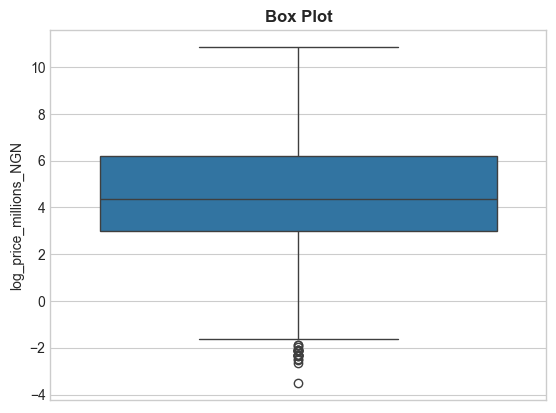

In [9]:
# 3. Box plot
ax = sns.boxplot(data=data, y='log_price_millions_NGN')
ax.set_title('Box Plot', fontsize=12, fontweight='bold');

The horizontal line inside the box represents the median (50th percentile) of the data. This points to the median log value of **4.597**. Converting back to common logarithm (that is, base 10); \
The typical median price for properties in Lagos is : **33.58 million NGN**
Normally this would be the final answer but as shown in our earlier description of our data, the median of the price listings is not so as shown below:

In [10]:
data['price(millions_NGN)'].median()

np.float64(78.75)

This reveals an important insight: The median of the log-transformed data (4.366) does NOT equal log(median of original data).

This happens because the price data is highly skewed. The median you see in the original price(millions_NGN) column (78.75) is different from what you get when you convert the log median back.

Therefore apart from data visualization, the values gotten from any plot using the log tranform of the prices cannot be be referred to for accurate results. 

In conclusion, as shown in cell [43], the typical median price for houses in Lagos is given as 78.75 million NGN.

\
**Question 3 -\
How are listings distributed across low-, mid-, and high-price segments?**

Once again, referring back to the Box plot (for data visualization), listings can be distibuted across low, mid and high price segments using the the Box-plot quartiles. \
Low-priced segments corresponds to price listings less than or equal to Q1,\
Mid-priced segments corresponds to price listings between Q1 and Q3, while\
High-priced segments corresponds to price listings above Q3.

Due to the previous observation of the data in question 2, we would be computing quantiles based on the original price data and not on the log transformed prices.

In [11]:
df = data.copy()
q1 = df['price(millions_NGN)'].quantile(0.25)
q3 = df['price(millions_NGN)'].quantile(0.75)

low = df[df['price(millions_NGN)'] <= q1]
mid = df[(df['price(millions_NGN)'] > q1) & (df['price(millions_NGN)'] < q3)]
high = df[df['price(millions_NGN)'] >= q3]

print(f'Number of houses in the Low-priced segment : {len(low)}')
print(f'Number of houses in the Mid-priced segment : {len(mid)}')
print(f'Number of houses in the High-priced segment : {len(high)}')

print(f'\nPercentage of houses in the Low-priced segment : {len(low)/len(df)*100:.2f}%')
print(f'Percentage of houses in the Mid-priced segment : {len(mid)/len(df)*100:.2f}%')
print(f'Percentage of houses in the High-priced segment : {len(high)/len(df)*100:.2f}%')

print(f'\nLower Quartile of the price data: {q1} millions_NGN')
print(f'Median of the price data: {df["price(millions_NGN)"].median()} millions_NGN')
print(f'Upper quartile of the price data: {q3} millions_NGN')

Number of houses in the Low-priced segment : 281
Number of houses in the Mid-priced segment : 547
Number of houses in the High-priced segment : 276

Percentage of houses in the Low-priced segment : 25.45%
Percentage of houses in the Mid-priced segment : 49.55%
Percentage of houses in the High-priced segment : 25.00%

Lower Quartile of the price data: 20.0 millions_NGN
Median of the price data: 78.75 millions_NGN
Upper quartile of the price data: 482.5 millions_NGN


**In conclusion - \
Prices below or equal to 20 million_NGN are in the low price segments\
Prices between 20 million and 482.5 million_NGN are in the mid price segment\
Prices above or equals to 482.5 million_NGN are in the high price segment.**

**Question 4 -\
How does price vary with number of bedrooms?**

Grouping the price data by the number of beds using various summary statistics, we can further have an understanding of our data, and how the prices of houses vary with number of bedrooms.

In [12]:
df_plot = df.dropna(subset=['beds','price(millions_NGN)']).copy()
# Ensuring integer bedroom counts:
try:
    df_plot['beds'] = df_plot['beds'].astype(int)
except Exception:
    df_plot['beds'] = df_plot['beds'].round().astype(int)

# Showing group statistics:
grp = df_plot.groupby('beds')['price(millions_NGN)'].agg(['count','median','mean','std']).reset_index()
print(grp.to_string(index=False))

 beds  count      median        mean         std
    0    253   15.000000 1658.771410 5409.879017
    1     41   18.000000   88.779700  123.048263
    2    151   40.000000  140.423034  179.652428
    3    194   35.584625  202.261411  383.057638
    4    254  192.500000  395.240854  589.312921
    5    178  475.000000  700.853780  838.340434
    6     25  750.000000 2569.387560 5807.756808
    7      1   50.000000   50.000000         NaN
    9      3  274.886300  958.295433 1249.114099
   11      1 2400.000000 2400.000000         NaN
   14      1 1300.000000 1300.000000         NaN
   16      1   70.000000   70.000000         NaN
   47      1 5000.000000 5000.000000         NaN


To show spread and outliers in our data, we would be making use of a Box plot.

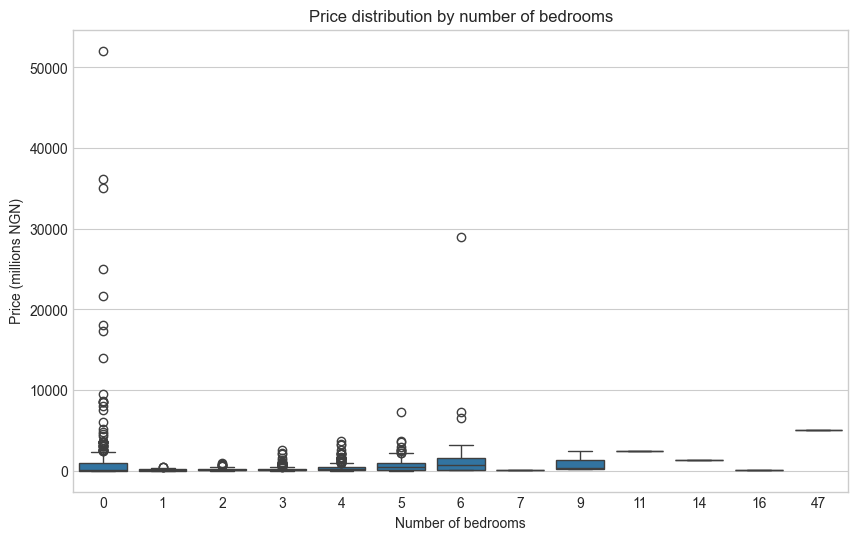

In [13]:
# boxplot: price distribution by beds
plt.figure(figsize=(10,6))
sns.boxplot(data=df_plot, x='beds', y='price(millions_NGN)')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price (millions NGN)')
plt.title('Price distribution by number of bedrooms')
plt.show()

Lastly, to answer the question itself, we would be making a plot of the median price per bedrooms, as shwon below:

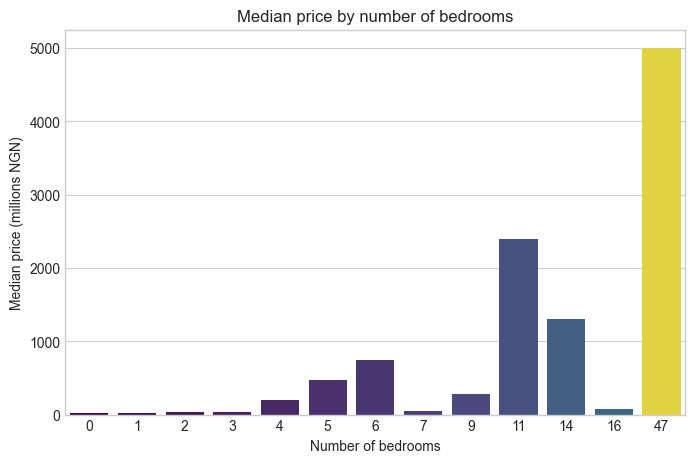

In [14]:
# median bar chart
medians = df_plot.groupby('beds')['price(millions_NGN)'].median().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=medians.index, y=medians.values, palette='viridis', hue=medians.index, legend=False)
plt.xlabel('Number of bedrooms')
plt.ylabel('Median price (millions NGN)')
plt.title('Median price by number of bedrooms')
plt.show()

**In conclusion: \
Median price generally increases with number of bedrooms, but distributions overlap and outliers (very expensive properties) cause large variability (as we can see in the Box plot).**